In [1]:
import csv
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from copy import deepcopy
from scipy.spatial.distance import cdist

In [2]:
#reading data into data
data = pd.read_csv('overallnew.csv')
print("Input data and shape")
print(type(data))
data.head()
data.shape

Input data and shape
<class 'pandas.core.frame.DataFrame'>


(46252, 8)

In [3]:
print(max(data['Latitude']))
print(min(data['Latitude']))
print(max(data['Longitude']))
print(min(data['Longitude']))
print(type(data['Latitude']))
print(type(data['Longitude']))

38.99287800000001
0.0
0.0
-76.94402585367764
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [4]:
#Final data types
data.dtypes

Unnamed: 0      int64
LUID           object
Date            int64
Latitude      float64
Longitude     float64
Floor           int64
BuildingID      int64
Time            int64
dtype: object

In [5]:
#Checking if any data is empty
data[pd.isnull(data).any(axis=1)]

,Unnamed: 0,LUID,Date,Latitude,Longitude,Floor,BuildingID,Time


In [6]:
#2 features on which clustering should happen
f1 = data['Latitude'].values
f2 = data['Longitude'].values

In [7]:
#zipping the features
X = np.array(list(zip(f1, f2)))
X

array([[ 38.99255839, -76.94401871],
       [ 38.99255839, -76.94401871],
       [ 38.99255839, -76.94401871],
       ...,
       [ 38.99033796, -76.93636387],
       [ 38.99033796, -76.93636387],
       [ 38.99037044, -76.93636963]])

Text(0.5,1,'Date vs Time for LUIDs')

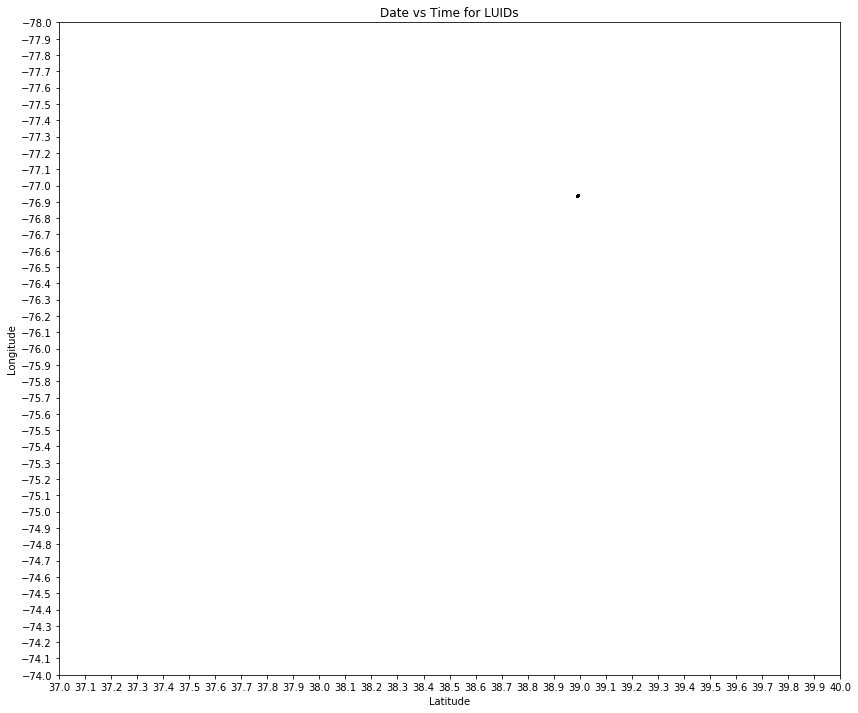

In [8]:
#Number of clusters = 3
k = 2

# #Random centroids
# C_x = np.random.randint(0, 8, size=k)
# C_y = np.random.randint(-1, 49, size=k)

# C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
# print(C)

#Before clustering, just plotting the points
fig, ax = plt.subplots(figsize=(14, 12))

tick_spacingx = 0.1
tick_spacingy = 0.1
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

plt.scatter(f1, f2, c='#050505', s = 2)
# plt.scatter(C_x, C_y, marker='*', s = 100, c='g')
plt.ylim([-74, -78])
plt.xlim([37,40])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Date vs Time for LUIDs")

In [11]:
X

array([[ 38.99255839, -76.94401871],
       [ 38.99255839, -76.94401871],
       [ 38.99255839, -76.94401871],
       ...,
       [ 38.99033796, -76.93636387],
       [ 38.99033796, -76.93636387],
       [ 38.99037044, -76.93636963]])

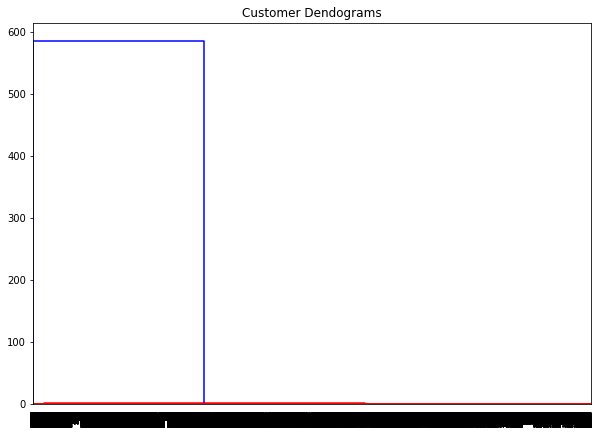

In [13]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
print(cluster.labels_)

[0 0 0 ... 0 0 0]


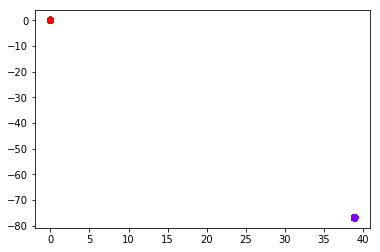

In [10]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')  

In [ ]:
#Number of clusters = 3
k = 3

#Random centroids
C_x = np.random.randint(0, 8, size=k)
C_y = np.random.randint(-1, 49, size=k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

#Before clustering, just plotting the points
fig, ax = plt.subplots(figsize=(14, 12))

tick_spacingx = 1
tick_spacingy = 1
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

plt.scatter(f1, f2, c='#050505', s = 2)
plt.scatter(C_x, C_y, marker='*', s = 100, c='g')
plt.ylim([-1, 49])
plt.xlim([0, 8])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Date vs Time for LUIDs")

In [ ]:
#Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:
#To store the value of centroids when it updates
C_old = np.zeros(C.shape)

#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error)

In [ ]:
#Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    print(C_old)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print(error)

In [ ]:
 #Plotting after clustering
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots(figsize=(14, 12))
plt.ylim([-1, 49])
plt.xlim([0, 8])
plt.xlabel("Date")
plt.ylabel("Time")
plt.title("Clustering")

tick_spacingx = 1
tick_spacingy = 1
ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=20, c='#050505')



In [ ]:
#Final centroid cluster
print(C)